<a href="https://colab.research.google.com/github/intuition-explorer/ML-Algorithms/blob/main/StudentDropout_SMOTE_Trees_ROC_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step 1-unsupervised
#Clustering: segmenting students by performance or engagement patterns: K-means, Spectral (maybe Hierarchial too)
#Dimension Reduction for visualization: tSNE and UMAP-preserve local neighborhood structure

#Step 2-Supervised, ultimate prediction, can use clusters as features
#Classification: dropout vs stay: SVM, Logistic Regression, RandomForest, GradientBoost

In [ ]:
#Pipeline: Clarify goal, success metrics and real world constraints-latency, interpretability, fairness
#1 Data preprocessing:clean missing values, encode categorical, normalize features
#2 Train, validate, test. Startified per classification, there was kfolds something, this i need to work on and then actually test after validate*
#3 Exploratory Clustering: kmeans + spectral into visualize tSNE and UMAP, then check if correspond to meaningful groups
#4 Feature Engineering** add cluster ID or membership probability as features
#5 Classification: Train classifier:Logistic, then RF and GB, compare predictivity, (add SVM if want geometry)
#6 Evaluation: Precision, Recall, F1:Review Confusion Matrix, Support? + **ROC/AUC for probability based models-idk this at all
#7 Pipeline packaging: reproducible workflow with scikit learn??

In [ ]:
from google.colab import files
files.upload()

Saving data.csv to data.csv


{'data.csv': b'\xef\xbb\xbfMarital status;Application mode;Application order;Course;"Daytime/evening attendance\t";Previous qualification;Previous qualification (grade);Nacionality;Mother\'s qualification;Father\'s qualification;Mother\'s occupation;Father\'s occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target\r\n1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1;1;0;20;0;0;0;0;0;0.0;0;0;0;0;0;0.0;0;10.

In [ ]:
import pandas as pd
data = pd.read_csv('data.csv', header = 0, sep = ';')
#need to do header = 0 to make it column name, and need sep=; to make it 37 not 1 column

In [ ]:
data.head() #Okay so i need to clean make into columns? header = None gets rid of words ontop now i need to make columns? first keep it to get names then delete

#If i use str.split( ';', expand = True)
#data_split = data[0].split(';', expand= True), need column name and then add each manually. Expand doesnt work for some reason though, obove solution better


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
data.shape #37 features
data.info() # no missing data but all objects? now int with fixing column name or float, everything but target
data.describe() #this is stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
#read documentation to make sense of this, encoding has been done
data['Marital status'].unique() #1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated
#The type of label I guess is fine for trees: DT, RF, GB, fine for label encoding
#If want distance between categories use one hot encoding instead

array([1, 2, 4, 3, 5, 6])

In [ ]:
data['Application mode'].unique() #Given all the encodings referring to documentation label encoding and tree techn seems the way to go
#documentation reveals should use SMOTE; imbalance of graduate, dropout and enrolled
#they primarily used trees and variants so I was correct. Maybe can find a way to one hot encode everything... but that'll increase dimensionality

array([17, 15,  1, 39, 18, 53, 44, 51, 43,  7, 42, 16,  5,  2, 10, 57, 26,
       27])

In [ ]:
X = data.drop(['Target'], axis =1).copy()
print(X.shape[1]) #remove target, 36 columns now

corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

36


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,0.034994,0.031609,-0.004771,-0.234886,-0.028343,0.034304,-0.087158,-0.014738,-0.053765,0.522717,-0.027905,0.061209,0.052107,0.058030,-0.031027,-0.059811,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,0.051600,0.036707,-0.013271,-0.301197,-0.030779,0.122818,-0.136262,0.160130,-0.163117,0.516243,0.003438,0.247426,0.164299,0.225938,-0.029055,-0.117741,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,-0.039039,-0.030014,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,-0.271154,-0.028801,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,0.031265,0.028881,-0.125058,-0.087399,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,-0.026737,-0.096335,0.328461,0.272845,0.180500,0.389349,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime/evening attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,-0.019067,-0.015477,0.007970,0.251767,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.027973,-0.127466,-0.043056,-0.045889,0.016935,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,0.014822,0.016263,0.184183,-0.115188,-0.010461,0.095104,-0.068453,0.078684,-0.070513,0.156234,-0.026226,0.166025,0.078702,0.130597,0.022020,-0.000497,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,-0.011415,-0.019284,0.580444,-0.011001,-0.001458,-0.037507,0.060578,-0.047874,0.055965,-0.111377,0.048529,-0.008872,-0.029169,-0.070702,0.048410,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,0.043187,0.020626,0.028176,-0.007448,-0.005982,0.051989,-0.026115,-0.023258,-0.010490,-0.003647,0.790935,-0.000370,-0.013292,-0.007763,-0.002268,0.000869,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,0.076772,0.052329,-0.054412,-0.081176,-0.021534,0.018774,-0.025665,-0.058753,0.045951,0.294614,-0.038504,0.046855,0.053664,0.045

In [ ]:
#Feature Importance should be assessed given heat map and multicollinearity, common tech here is Permutation Feature Importance on a Model
#randomize feature and see how it affects accuracy like F1 metric (adqeuate for imbalanced data) takes into account trade off between precision & recall
y = data['Target'].copy()
print(y.unique())

['Dropout' 'Graduate' 'Enrolled']


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

X_train, X_temp, y_train, y_temp  = train_test_split(X, y, test_size =0.2, random_state=22, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size =0.5, random_state=22, stratify = y_temp)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

X_resampled, y_resampled = SMOTE(random_state=22).fit_resample(X_train, y_train)

print("Original class distribution:", sorted(Counter(y_train).items()))
print("Resampled class distribution:", Counter(y_resampled)) #The issue here is im making synthetic data points, would it be better to downsample instead...


(3539, 36) (442, 36) (443, 36)
(3539,) (442,) (443,)
Original class distribution: [('Dropout', 1137), ('Enrolled', 635), ('Graduate', 1767)]
Resampled class distribution: Counter({'Graduate': 1767, 'Enrolled': 1767, 'Dropout': 1767})


              precision    recall  f1-score   support

     Dropout       0.70      0.63      0.67       142
    Enrolled       0.37      0.43      0.40        79
    Graduate       0.78      0.79      0.79       221

    accuracy                           0.68       442
   macro avg       0.62      0.62      0.62       442
weighted avg       0.69      0.68      0.68       442



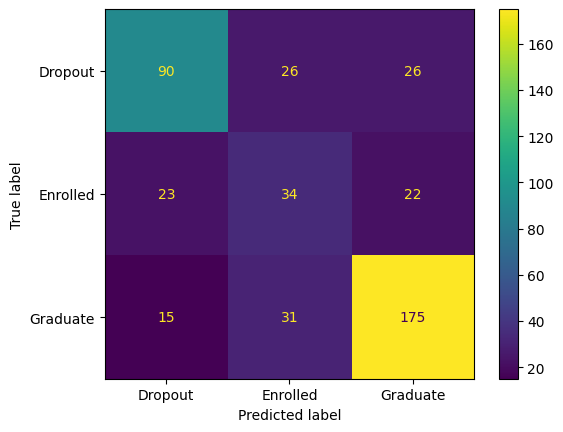

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=10) #max_depth=10 performs bbetter than not specifiying
clf = clf.fit(X_resampled, y_resampled)

from sklearn import metrics
y_pred = clf.predict(X_val)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_val, y_pred))
print(metrics.classification_report(y_val, y_pred))

              precision    recall  f1-score   support

     Dropout       0.75      0.68      0.72       142
    Enrolled       0.37      0.45      0.41        80
    Graduate       0.81      0.80      0.80       221

    accuracy                           0.70       443
   macro avg       0.64      0.64      0.64       443
weighted avg       0.71      0.70      0.70       443



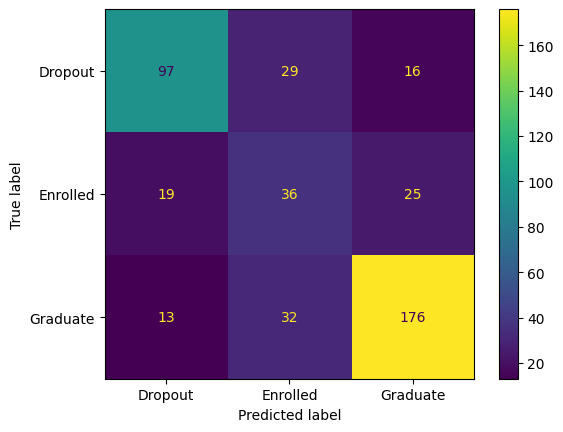

In [ ]:
true_predict = clf.predict(X_test)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, true_predict))
print(metrics.classification_report(y_test, true_predict))

In [ ]:
clf.classes_

array(['Dropout', 'Enrolled', 'Graduate'], dtype=object)

              precision    recall  f1-score   support

     Dropout       0.83      0.63      0.72       142
    Enrolled       0.52      0.53      0.53        79
    Graduate       0.77      0.88      0.82       221

    accuracy                           0.74       442
   macro avg       0.71      0.68      0.69       442
weighted avg       0.74      0.74      0.73       442



'\n#Each tree makes a prediction, then averages, so can convert leaf frequencies into probability classes\ny_prob = rclf.predict_proba(X_test)[:,0] #here : says take all rows and then particulary column from y stored as clf.classes_, check above, parses it as an int\n\nfpr, tpr, thresholds = roc_curve(y_test, y_prob)\nroc_auc = auc(fpr, tpr)\n\n# Plot\nplt.figure(figsize=(6,6))\nplt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")\nplt.plot([0,1], [0,1], color="gray", linestyle="--")  # random classifier\nplt.xlabel("False Positive Rate")\nplt.ylabel("True Positive Rate (Recall)")\nplt.title("ROC Curve - Student Dropout Prediction")\nplt.legend(loc="lower right")\nplt.show()\n\n'

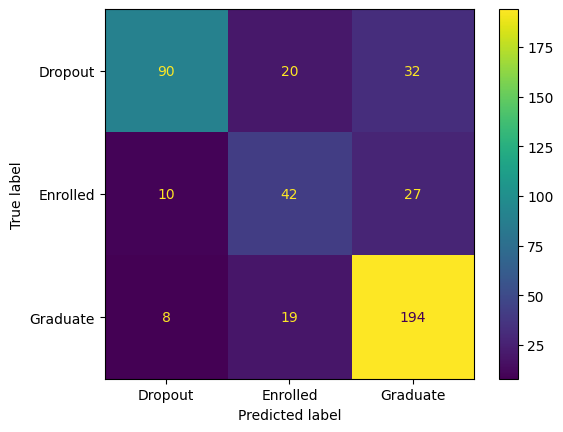

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

rclf = RandomForestClassifier(n_estimators=100, max_depth=10) #samples diff parts of X, due to sub with replacement
rclf = rclf.fit(X_resampled, y_resampled)
yr_pred = rclf.predict(X_val)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_val, yr_pred))
print(metrics.classification_report(y_val, yr_pred))

#ROC curve for binary below
'''
#Each tree makes a prediction, then averages, so can convert leaf frequencies into probability classes
y_prob = rclf.predict_proba(X_test)[:,0] #here : says take all rows and then particulary column from y stored as clf.classes_, check above, parses it as an int

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="gray", linestyle="--")  # random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Student Dropout Prediction")
plt.legend(loc="lower right")
plt.show()

'''


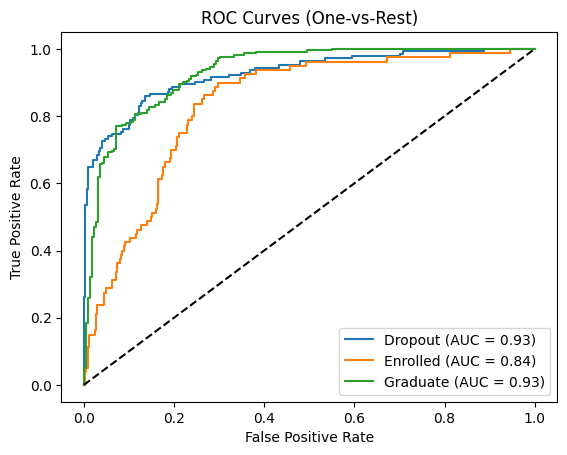

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize labels for OvR (one column per class)
y_test_bin = label_binarize(y_test, classes=rclf.classes_)

# Get predicted probabilities
y_prob = rclf.predict_proba(X_test)

# Plot ROC curve for each class
for i, class_label in enumerate(rclf.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (One-vs-Rest)")
plt.legend()
plt.show()
#ROC goes over every threshold possibility, not just 0.5 if above or below classify, if ROC curve on diagonal its guess, if more to the left it's classifying
#at 0 threshold everything is positive, TPR and FPR=1 at 1 nothign is positive TPR=FPR=0, so it's checking all threhsolds in between as well
#AUC robust to class imbalance, should calcluate per class 0.8-0.9 really good it means its separating classes well

In [ ]:
from sklearn.metrics import roc_auc_score

# macro-average AUC
macro_auc = roc_auc_score(y_test_bin, y_prob, average="macro", multi_class="ovr")
print("Macro-average AUC:", macro_auc)


Macro-average AUC: 0.8973008787344341


              precision    recall  f1-score   support

     Dropout       0.81      0.68      0.74       142
    Enrolled       0.55      0.53      0.54        79
    Graduate       0.78      0.87      0.83       221

    accuracy                           0.75       442
   macro avg       0.72      0.70      0.70       442
weighted avg       0.75      0.75      0.75       442



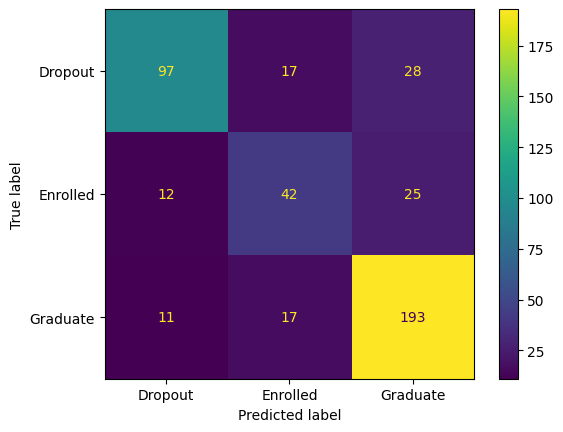

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier #super slow, this learns errors of previous trees #Prefers stumps!!

gclf = GradientBoostingClassifier(n_estimators=100, max_depth=3)
gclf = gclf.fit(X_resampled, y_resampled)
yg_pred = gclf.predict(X_val)

print(metrics.ConfusionMatrixDisplay.from_predictions(y_val, yg_pred))
print(metrics.classification_report(y_val, yg_pred))
